# Marketing Campaigns - Exploratory Data Analysis & Hypothesis Testing

**Course-end Project 1 | IIT Khanpur AI/ML Course**

**Problem Objective:** Conduct exploratory data analysis and hypothesis testing to understand the diverse factors influencing customer acquisition, focusing on the marketing mix (4 Ps: People, Product, Place, Promotion).

## 1. Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('datasets/marketing_data.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (2240, 28)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## 2. Initial Data Inspection

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int64
 1   Year_Birth           2240 non-null   int64
 2   Education            2240 non-null   str  
 3   Marital_Status       2240 non-null   str  
 4    Income              2216 non-null   str  
 5   Kidhome              2240 non-null   int64
 6   Teenhome             2240 non-null   int64
 7   Dt_Customer          2240 non-null   str  
 8   Recency              2240 non-null   int64
 9   MntWines             2240 non-null   int64
 10  MntFruits            2240 non-null   int64
 11  MntMeatProducts      2240 non-null   int64
 12  MntFishProducts      2240 non-null   int64
 13  MntSweetProducts     2240 non-null   int64
 14  MntGoldProds         2240 non-null   int64
 15  NumDealsPurchases    2240 non-null   int64
 16  NumWebPurchases      2240 non-null 

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216,1974,"$7,500.00",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,8/31/12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


In [5]:
print("Missing values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:
Income     24
dtype: int64

Total missing values: 24


## 3. Data Cleaning

### 3.1 Fix Column Names & Parse Income

In [6]:
# Fix column name with leading/trailing spaces
df.columns = df.columns.str.strip()

# Parse Income: remove '$' and ',' then convert to float
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

print("Income column after cleaning:")
print(df['Income'].describe())
print(f"\nMissing Income values: {df['Income'].isnull().sum()}")

Income column after cleaning:
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Missing Income values: 24


### 3.2 Parse Dt_Customer

In [7]:
# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

print("Dt_Customer after parsing:")
print(f"Min: {df['Dt_Customer'].min()}")
print(f"Max: {df['Dt_Customer'].max()}")
print(f"Dtype: {df['Dt_Customer'].dtype}")
df[['Dt_Customer']].head()

Dt_Customer after parsing:
Min: 2012-07-30 00:00:00
Max: 2014-06-29 00:00:00
Dtype: datetime64[us]


,Dt_Customer
0,2014-06-16
1,2014-06-15
2,2014-05-13
3,2014-05-11
4,2014-04-08


### 3.3 Clean Marital Status & Education Categories

Marital_Status contains unusual values like 'YOLO', 'Alone', and 'Absurd' that need cleaning.

In [8]:
print("Marital_Status value counts BEFORE cleaning:")
print(df['Marital_Status'].value_counts())
print("\nEducation value counts:")
print(df['Education'].value_counts())

Marital_Status value counts BEFORE cleaning:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

Education value counts:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [9]:
# Clean Marital_Status: map unusual categories to meaningful ones
marital_map = {
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}
df['Marital_Status_Clean'] = df['Marital_Status'].map(marital_map)

print("Marital_Status_Clean value counts AFTER cleaning:")
print(df['Marital_Status_Clean'].value_counts())

Marital_Status_Clean value counts AFTER cleaning:
Marital_Status_Clean
Partner    1444
Single      796
Name: count, dtype: int64


## 4. Missing Value Imputation

Customers with similar education and marital status tend to have comparable yearly incomes. We impute missing Income values using the **median** income of their education + marital status group.

In [10]:
# Check group medians before imputation
group_medians = df.groupby(['Education', 'Marital_Status_Clean'])['Income'].median()
print("Group median incomes (Education x Marital Status):")
print(group_medians.unstack().to_string())

# Impute missing Income with group median
df['Income'] = df.groupby(['Education', 'Marital_Status_Clean'])['Income'].transform(
    lambda x: x.fillna(x.median())
)

print(f"\nMissing Income values after imputation: {df['Income'].isnull().sum()}")

Group median incomes (Education x Marital Status):
Marital_Status_Clean  Partner   Single
Education                             
2n Cycle              46219.0  48470.5
Basic                 23179.0  16383.0
Graduation            51763.5  52372.5
Master                50920.5  51124.0
PhD                   57004.5  52278.0



Missing Income values after imputation: 0

## 5. Feature Engineering

In [11]:
# Total number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Age (using the max Dt_Customer year as reference)
reference_year = df['Dt_Customer'].dt.year.max()
df['Age'] = reference_year - df['Year_Birth']

# Total spending across all product categories
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Total purchases across the three channels
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Total campaigns accepted
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Campaigns_Accepted'] = df[campaign_cols].sum(axis=1)

print("New features created:")
print(df[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases', 'Total_Campaigns_Accepted']].describe())

New features created:


       Total_Children          Age  Total_Spending  Total_Purchases  \
count     2240.000000  2240.000000     2240.000000      2240.000000   
mean         0.950446    45.194196      605.798214        12.537054   
std          0.751803    11.984069      602.249288         7.205741   
min          0.000000    18.000000        5.000000         0.000000   
25%          0.000000    37.000000       68.750000         6.000000   
50%          1.000000    44.000000      396.000000        12.000000   
75%          1.000000    55.000000     1045.500000        18.000000   
max          3.000000   121.000000     2525.000000        32.000000   

       Total_Campaigns_Accepted  
count               2240.000000  
mean                   0.446875  
std                    0.890543  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    1.000000  
max                    5.000000  


## 6. Exploratory Data Analysis - Distributions & Outliers

### 6.1 Histograms of Key Numerical Variables

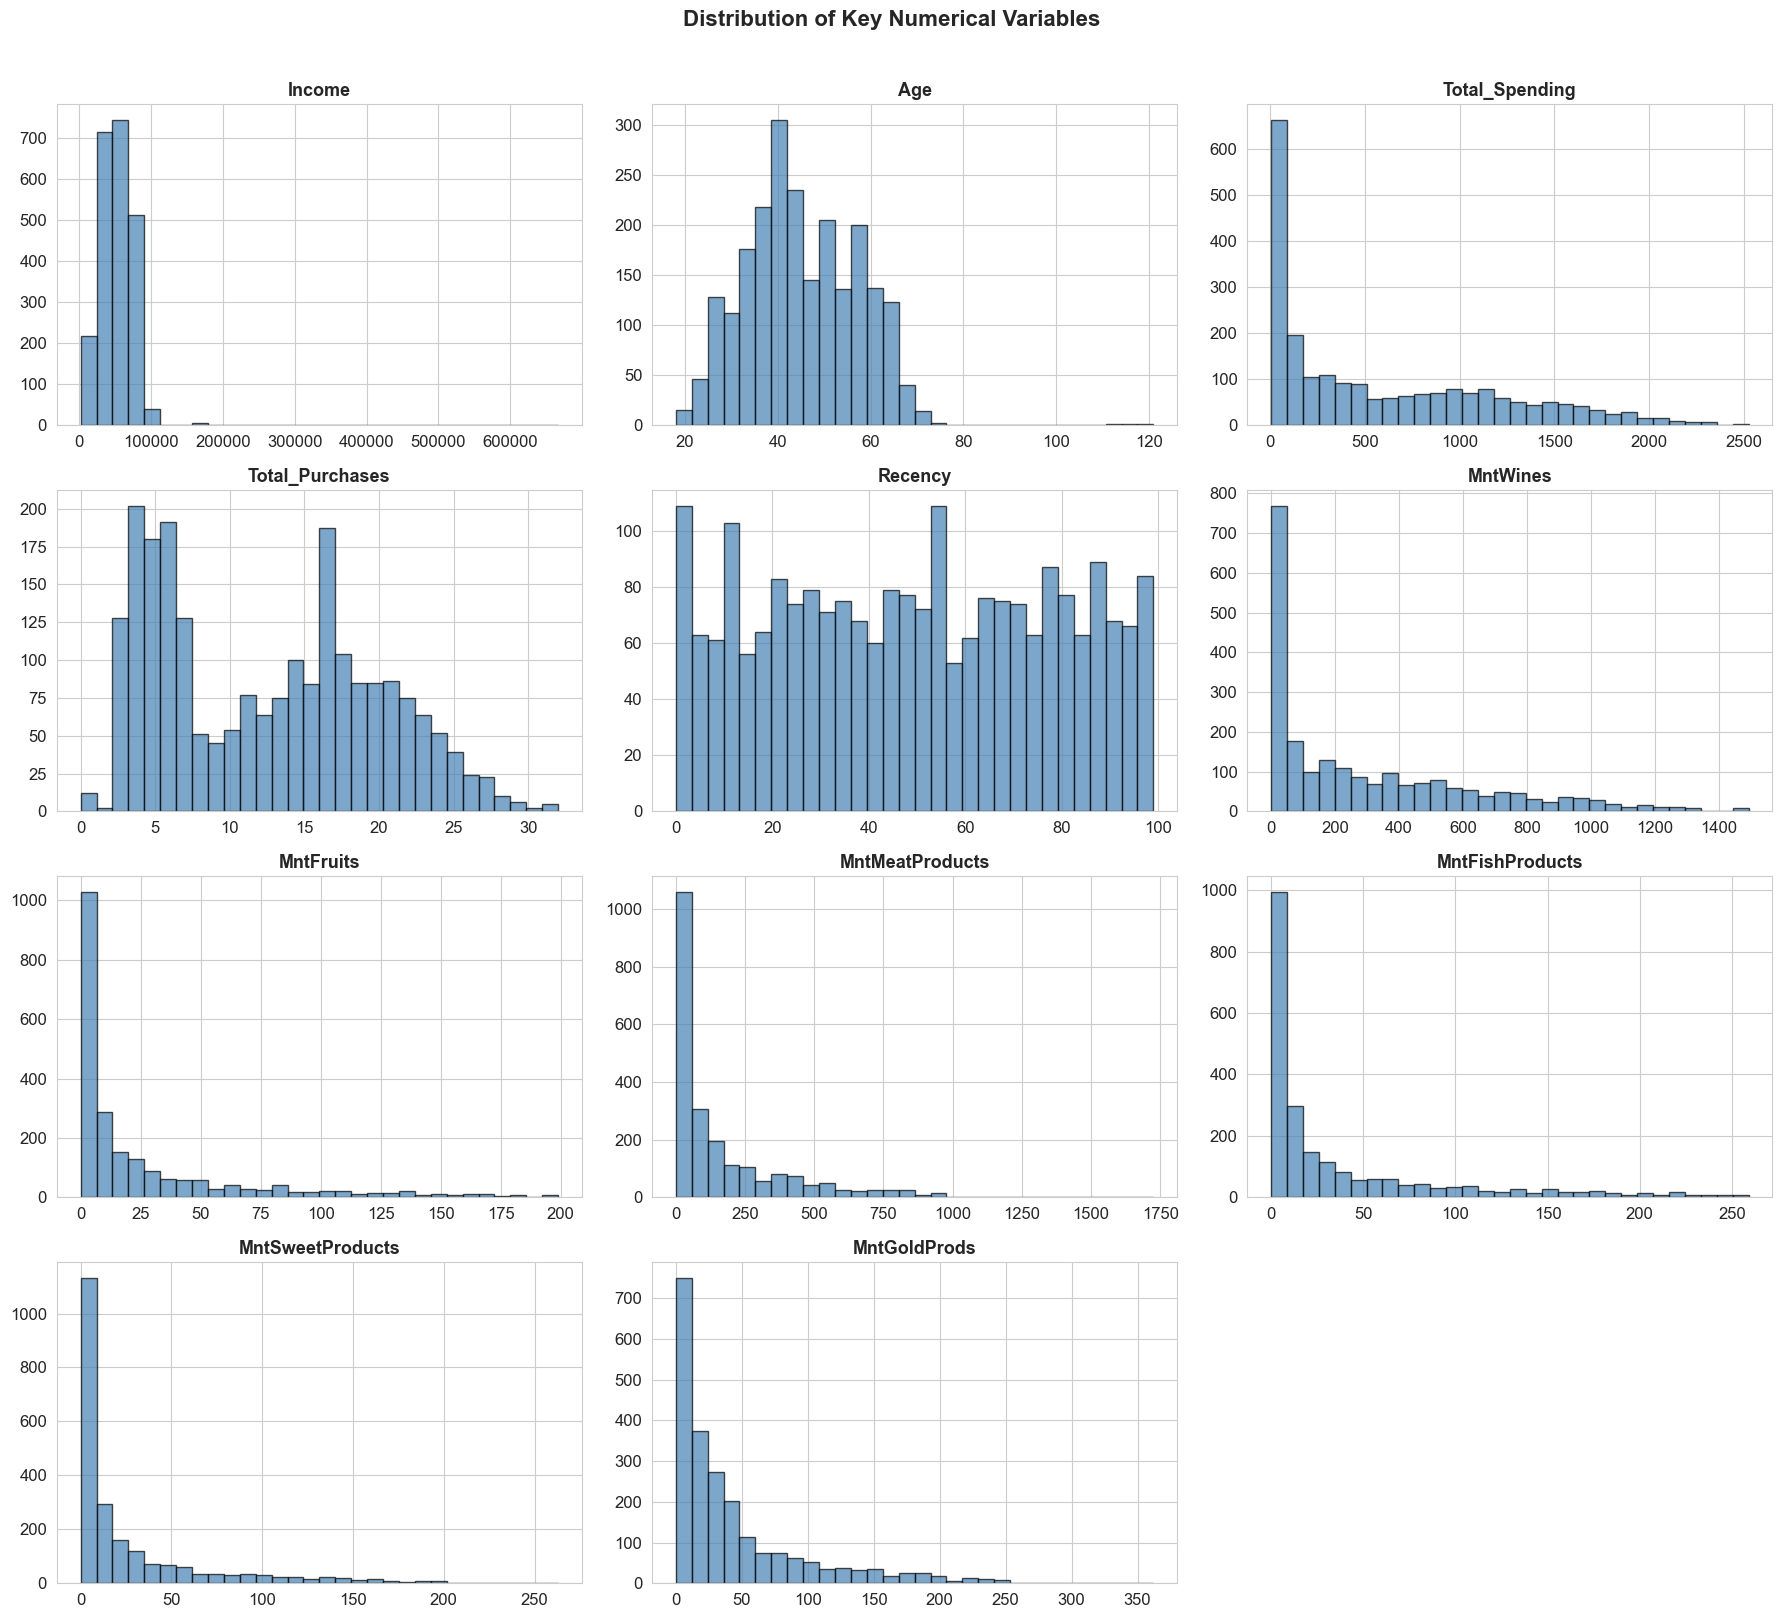

In [12]:
num_cols = ['Income', 'Age', 'Total_Spending', 'Total_Purchases', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(col, fontsize=13, fontweight='bold')
    axes[i].set_xlabel('')

# Hide unused subplot
axes[-1].set_visible(False)

plt.suptitle('Distribution of Key Numerical Variables', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### 6.2 Box Plots to Identify Outliers

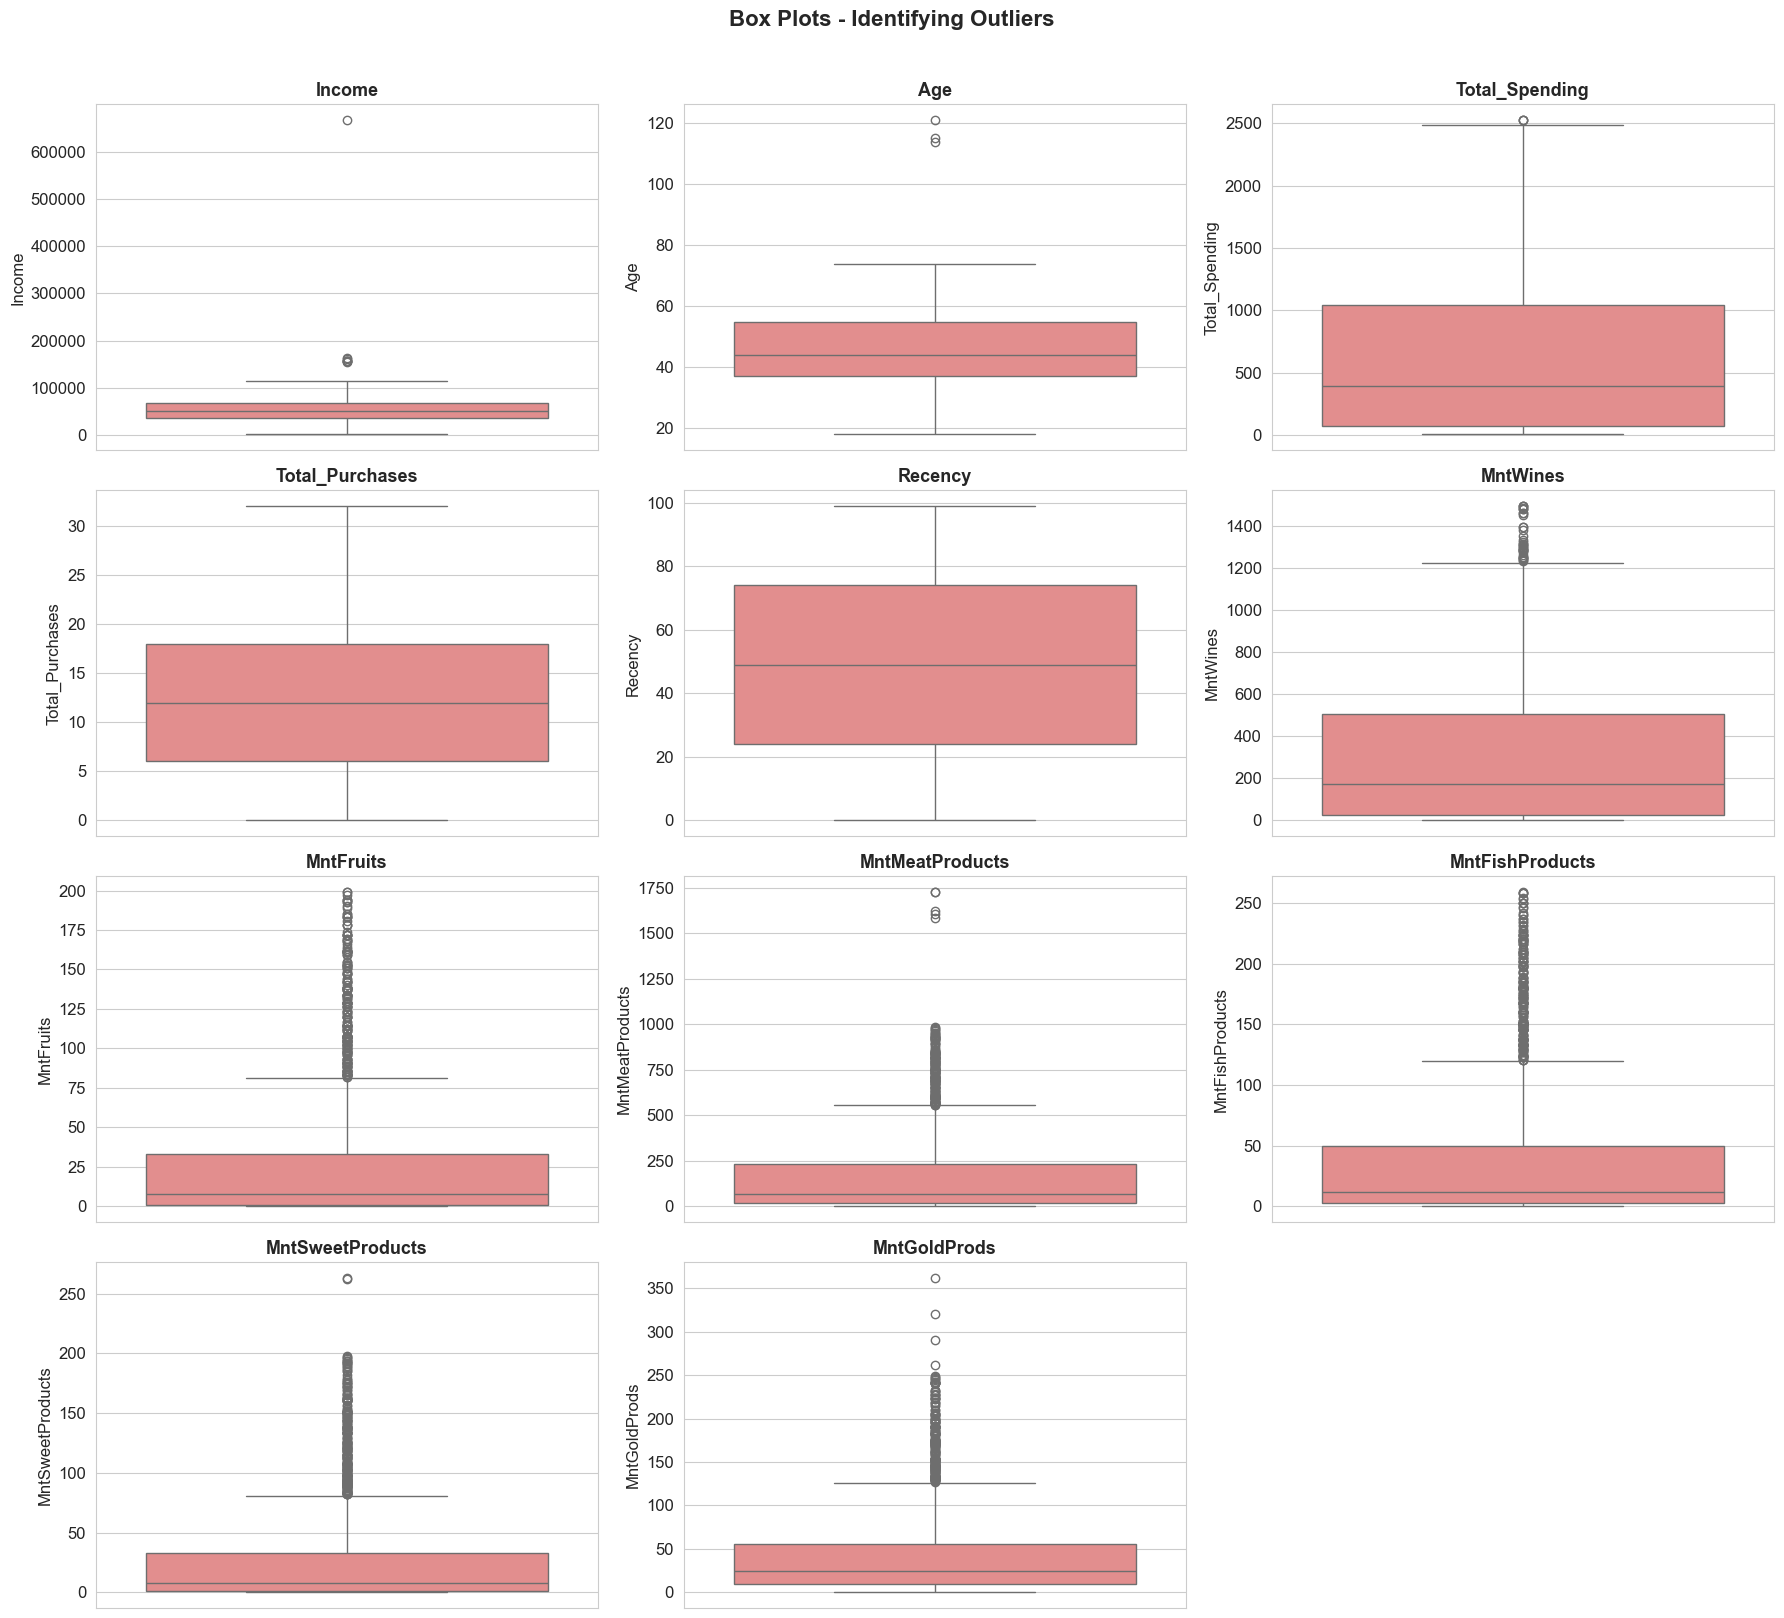

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(col, fontsize=13, fontweight='bold')

axes[-1].set_visible(False)

plt.suptitle('Box Plots - Identifying Outliers', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### 6.3 Outlier Treatment (IQR Method)

In [14]:
def treat_outliers_iqr(dataframe, column):
    """Cap outliers using the IQR method."""
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = ((dataframe[column] < lower) | (dataframe[column] > upper)).sum()
    dataframe[column] = dataframe[column].clip(lower=lower, upper=upper)
    return before

print(f"Dataset shape before outlier treatment: {df.shape}")

# Also remove extreme Age values (e.g., Year_Birth = 1893 -> Age > 120)
outlier_age = df[df['Age'] > 100].shape[0]
print(f"\nRemoving {outlier_age} rows with unrealistic Age > 100")
df = df[df['Age'] <= 100].copy()

# Treat outliers in Income using IQR capping
outlier_cols = ['Income', 'Total_Spending', 'MntWines', 'MntMeatProducts', 'MntGoldProds']
for col in outlier_cols:
    count = treat_outliers_iqr(df, col)
    print(f"  {col}: {count} outliers capped")

print(f"\nDataset shape after outlier treatment: {df.shape}")

Dataset shape before outlier treatment: (2240, 34)

Removing 3 rows with unrealistic Age > 100
  Income: 8 outliers capped
  Total_Spending: 3 outliers capped
  MntWines: 35 outliers capped
  MntMeatProducts: 174 outliers capped
  MntGoldProds: 206 outliers capped

Dataset shape after outlier treatment: (2237, 34)


## 7. Encoding Categorical Variables

### 7.1 Ordinal Encoding for Education

In [15]:
# Education has a natural order
education_order = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education_Ordinal'] = df['Education'].map(education_order)

print("Ordinal Encoding for Education:")
print(df[['Education', 'Education_Ordinal']].drop_duplicates().sort_values('Education_Ordinal'))

Ordinal Encoding for Education:
     Education  Education_Ordinal
54       Basic                  1
6     2n Cycle                  2
0   Graduation                  3
11      Master                  4
5          PhD                  5


### 7.2 One-Hot Encoding for Marital Status & Country

In [16]:
# One-hot encode Marital_Status_Clean and Country
df_encoded = pd.get_dummies(df, columns=['Marital_Status_Clean', 'Country'], drop_first=False, dtype=int)

print(f"Shape after encoding: {df_encoded.shape}")
print("\nNew encoded columns:")
encoded_cols = [c for c in df_encoded.columns if 'Marital_Status_Clean_' in c or 'Country_' in c]
print(encoded_cols)

Shape after encoding: (2237, 43)

New encoded columns:
['Marital_Status_Clean_Partner', 'Marital_Status_Clean_Single', 'Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']


## 8. Correlation Heatmap

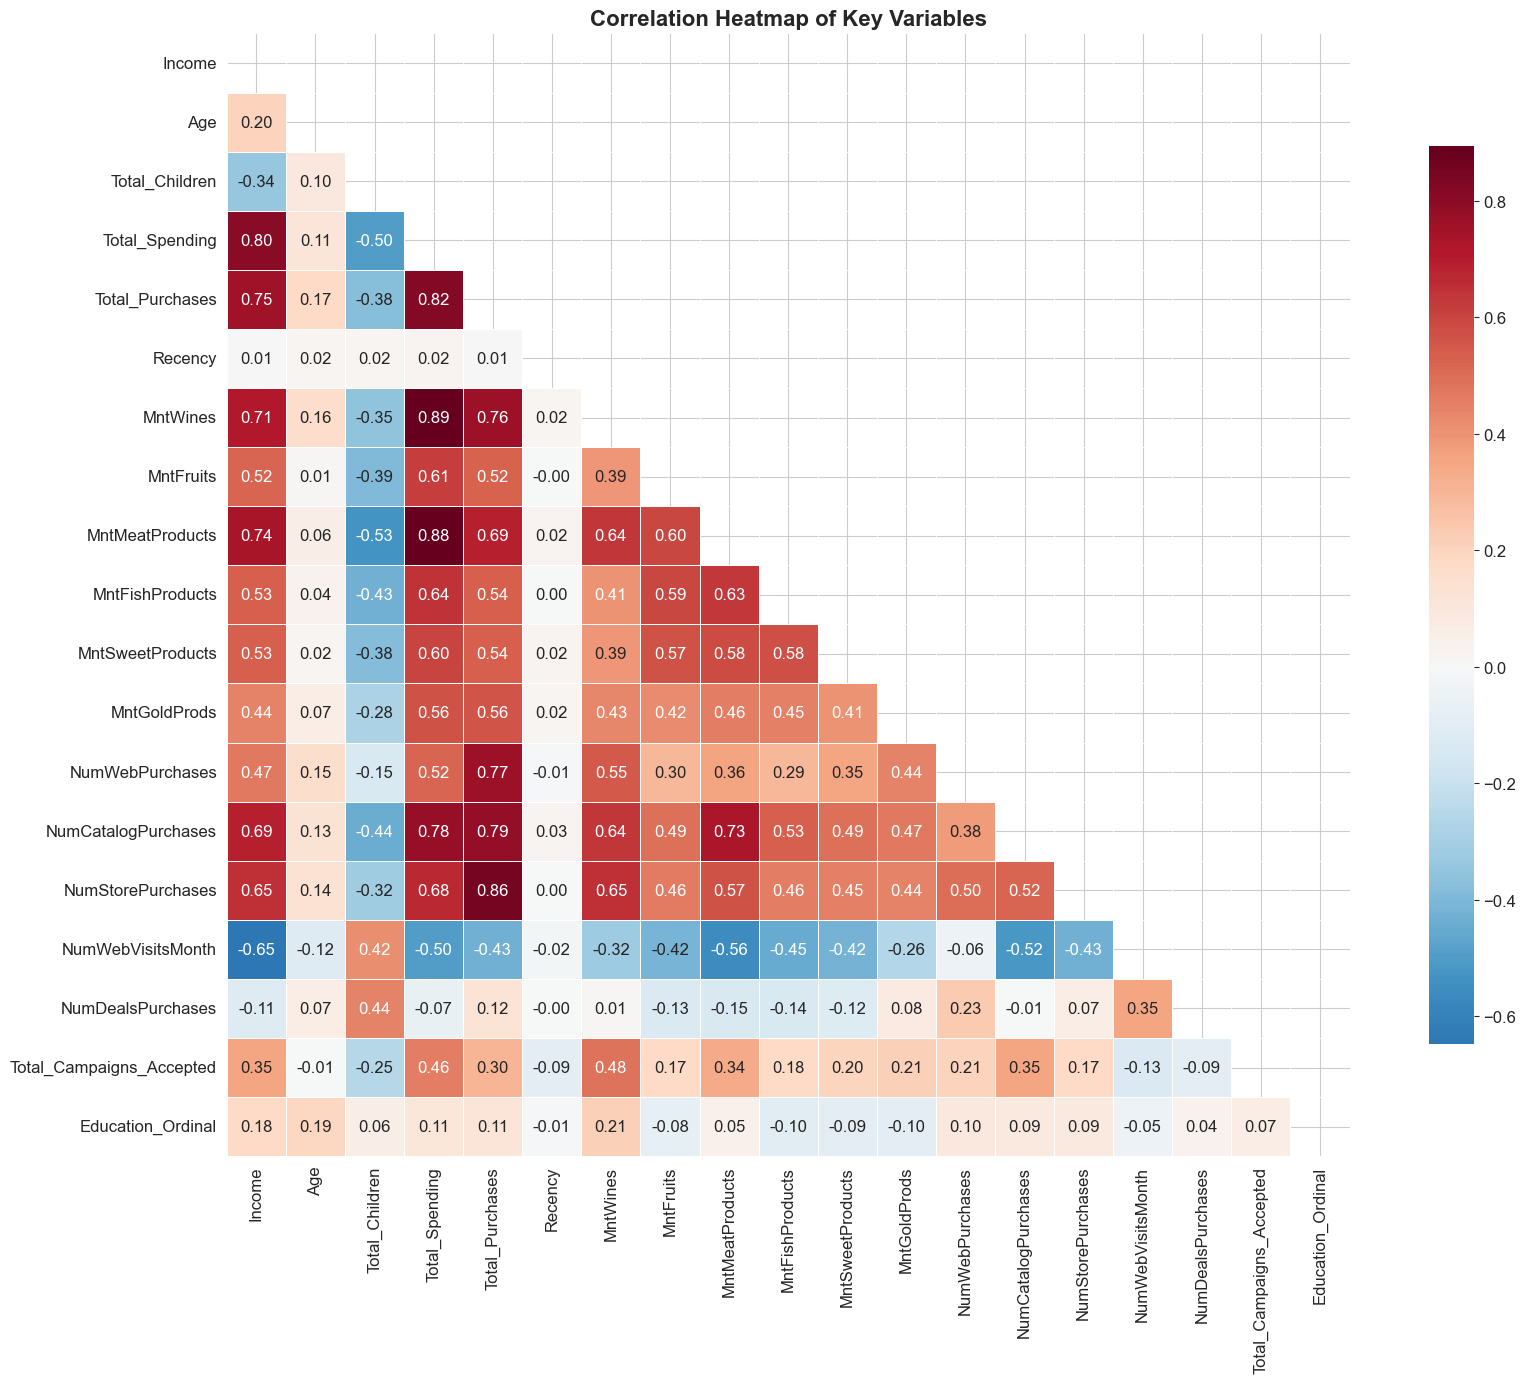

In [17]:
# Select key numerical columns for the heatmap
heatmap_cols = ['Income', 'Age', 'Total_Children', 'Total_Spending', 'Total_Purchases',
                'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
                'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases',
                'Total_Campaigns_Accepted', 'Education_Ordinal']

corr = df[heatmap_cols].corr()

plt.figure(figsize=(18, 14))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Key Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Hypothesis Testing

We use a significance level of **α = 0.05** for all tests.

### Hypothesis 1: Older individuals prefer in-store shopping over online shopping

**H₀:** There is no significant difference in the proportion of store purchases between older and younger customers.  
**H₁:** Older customers make a significantly higher proportion of their purchases in-store.

Median Age split: 44.0
Older group (>= 44.0): n=1147, mean store ratio = 0.4913
Younger group (< 44.0): n=1084, mean store ratio = 0.5203

t-statistic: -4.5932
p-value (one-tailed): 0.999998
✗ Fail to reject H₀: No significant difference in store purchase proportion by age group.


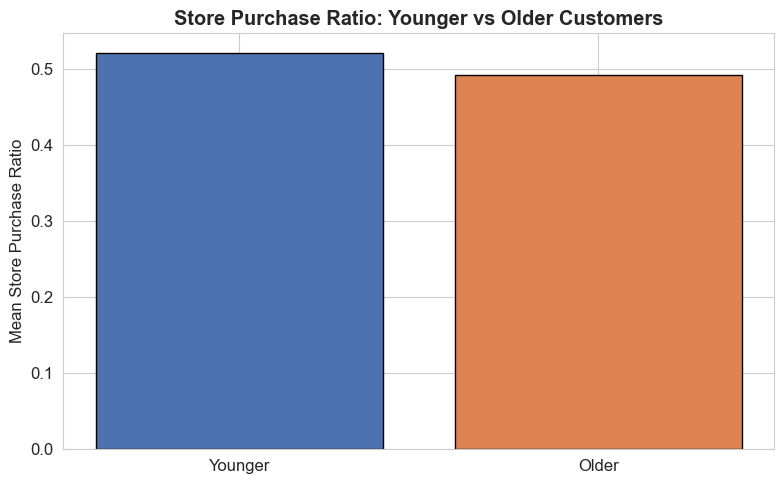

In [18]:
# Split into older (above median age) and younger groups
median_age = df['Age'].median()
older = df[df['Age'] >= median_age]
younger = df[df['Age'] < median_age]

# Calculate proportion of store purchases out of total purchases (avoid division by zero)
def store_ratio(group):
    mask = group['Total_Purchases'] > 0
    return group.loc[mask, 'NumStorePurchases'] / group.loc[mask, 'Total_Purchases']

older_ratio = store_ratio(older).dropna()
younger_ratio = store_ratio(younger).dropna()

print(f"Median Age split: {median_age}")
print(f"Older group (>= {median_age}): n={len(older_ratio)}, mean store ratio = {older_ratio.mean():.4f}")
print(f"Younger group (< {median_age}): n={len(younger_ratio)}, mean store ratio = {younger_ratio.mean():.4f}")

# Two-sample t-test (one-tailed: older > younger)
t_stat, p_value = stats.ttest_ind(older_ratio, younger_ratio, alternative='greater')
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value (one-tailed): {p_value:.6f}")

if p_value < 0.05:
    print("✓ Reject H₀: Older customers have a significantly higher proportion of in-store purchases.")
else:
    print("✗ Fail to reject H₀: No significant difference in store purchase proportion by age group.")

# Visualization
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(['Younger', 'Older'], [younger_ratio.mean(), older_ratio.mean()],
       color=['#4C72B0', '#DD8452'], edgecolor='black')
ax.set_ylabel('Mean Store Purchase Ratio')
ax.set_title('Store Purchase Ratio: Younger vs Older Customers', fontweight='bold')
plt.tight_layout()
plt.show()

### Hypothesis 2: Customers with children prefer online shopping

**H₀:** There is no significant difference in web purchases between customers with and without children.  
**H₁:** Customers with children make significantly more web purchases.

With children: n=1600, mean web purchases = 3.96
Without children: n=637, mean web purchases = 4.39

Mann-Whitney U statistic: 435080.5000
p-value (one-tailed): 1.000000
✗ Fail to reject H₀: No significant difference in web purchases based on children.


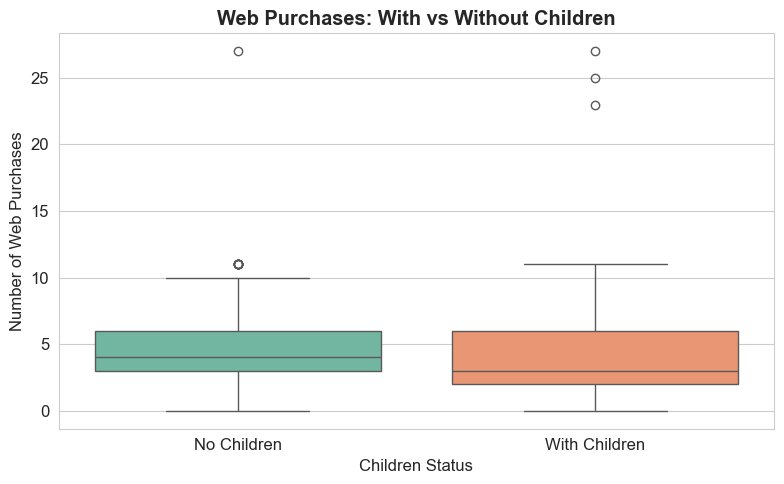

In [19]:
with_children = df[df['Total_Children'] > 0]['NumWebPurchases']
without_children = df[df['Total_Children'] == 0]['NumWebPurchases']

print(f"With children: n={len(with_children)}, mean web purchases = {with_children.mean():.2f}")
print(f"Without children: n={len(without_children)}, mean web purchases = {without_children.mean():.2f}")

# Mann-Whitney U test (non-parametric, one-tailed)
u_stat, p_value = stats.mannwhitneyu(with_children, without_children, alternative='greater')
print(f"\nMann-Whitney U statistic: {u_stat:.4f}")
print(f"p-value (one-tailed): {p_value:.6f}")

if p_value < 0.05:
    print("✓ Reject H₀: Customers with children make significantly more web purchases.")
else:
    print("✗ Fail to reject H₀: No significant difference in web purchases based on children.")

# Visualization
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=df['Total_Children'].apply(lambda x: 'With Children' if x > 0 else 'No Children'),
            y=df['NumWebPurchases'], ax=ax, palette='Set2')
ax.set_xlabel('Children Status')
ax.set_ylabel('Number of Web Purchases')
ax.set_title('Web Purchases: With vs Without Children', fontweight='bold')
plt.tight_layout()
plt.show()

### Hypothesis 3: Store sales face cannibalization from other channels

**H₀:** There is no significant negative correlation between store purchases and web/catalog purchases.  
**H₁:** There is a significant negative correlation (cannibalization).

Pearson correlation (Store vs Web+Catalog): 0.6153
p-value: 0.000000
✗ Fail to reject H₀: No evidence of cannibalization. The correlation is positive,
  suggesting customers who buy more in-store also buy more through other channels.


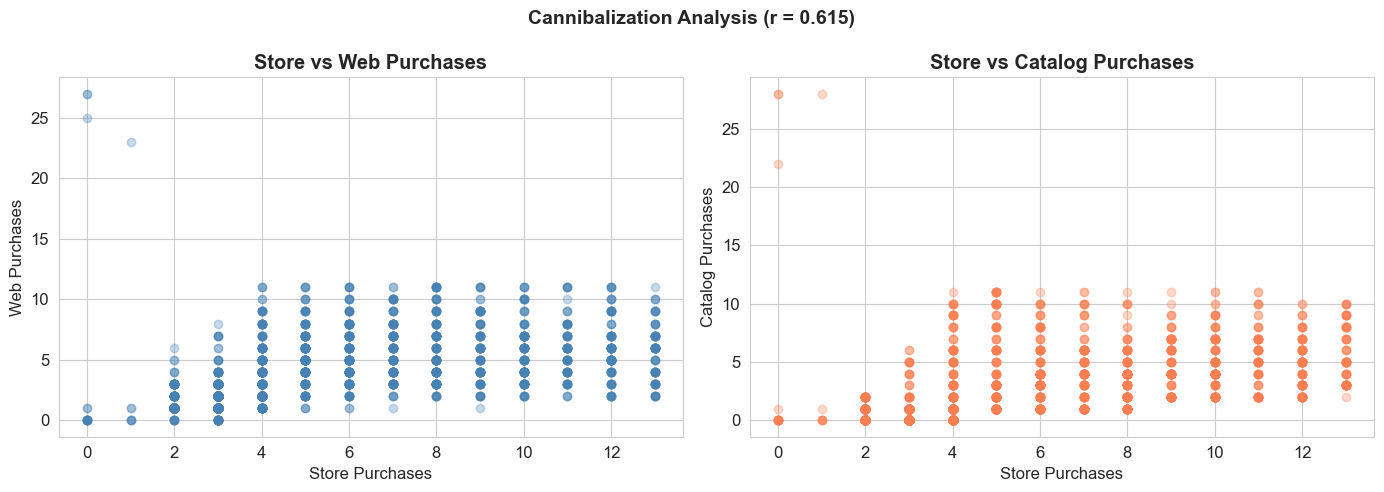

In [20]:
# Correlation between store purchases and other channels
other_channels = df['NumWebPurchases'] + df['NumCatalogPurchases']
corr_coef, p_value = stats.pearsonr(df['NumStorePurchases'], other_channels)

print(f"Pearson correlation (Store vs Web+Catalog): {corr_coef:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05 and corr_coef < 0:
    print("✓ Reject H₀: Significant negative correlation — evidence of cannibalization.")
else:
    print("✗ Fail to reject H₀: No evidence of cannibalization. The correlation is positive,")
    print("  suggesting customers who buy more in-store also buy more through other channels.")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df['NumStorePurchases'], df['NumWebPurchases'], alpha=0.3, color='steelblue')
axes[0].set_xlabel('Store Purchases')
axes[0].set_ylabel('Web Purchases')
axes[0].set_title('Store vs Web Purchases', fontweight='bold')

axes[1].scatter(df['NumStorePurchases'], df['NumCatalogPurchases'], alpha=0.3, color='coral')
axes[1].set_xlabel('Store Purchases')
axes[1].set_ylabel('Catalog Purchases')
axes[1].set_title('Store vs Catalog Purchases', fontweight='bold')

plt.suptitle(f'Cannibalization Analysis (r = {corr_coef:.3f})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Hypothesis 4: Does the US significantly outperform the rest of the world in total purchases?

**H₀:** The mean total purchases in the US is not significantly different from the rest of the world.  
**H₁:** The US has significantly higher total purchases.

US: n=109, mean total purchases = 13.51
Non-US: n=2128, mean total purchases = 12.49

t-statistic: 1.4409
p-value (one-tailed): 0.074880
✗ Fail to reject H₀: The US does not significantly outperform the rest of the world.


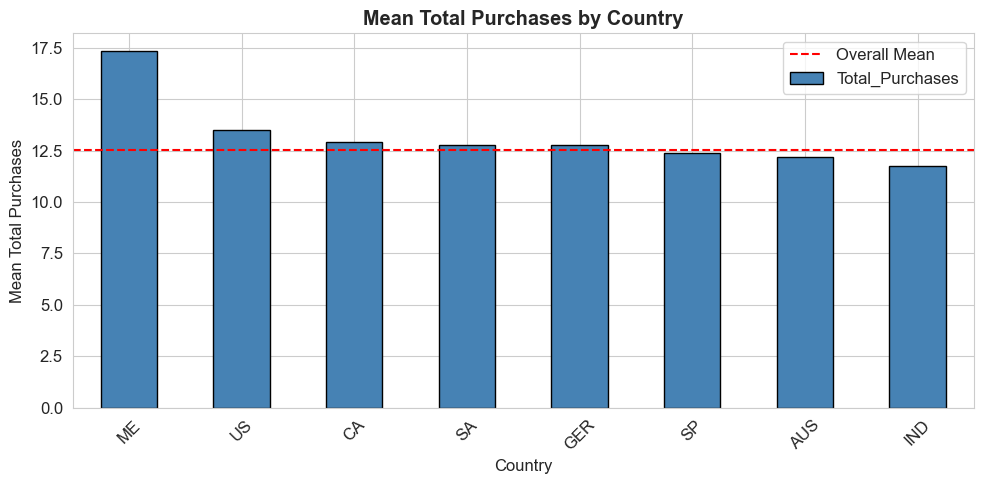

In [21]:
us_purchases = df[df['Country'] == 'US']['Total_Purchases']
non_us_purchases = df[df['Country'] != 'US']['Total_Purchases']

print(f"US: n={len(us_purchases)}, mean total purchases = {us_purchases.mean():.2f}")
print(f"Non-US: n={len(non_us_purchases)}, mean total purchases = {non_us_purchases.mean():.2f}")

# Two-sample t-test (one-tailed: US > rest)
t_stat, p_value = stats.ttest_ind(us_purchases, non_us_purchases, alternative='greater')
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value (one-tailed): {p_value:.6f}")

if p_value < 0.05:
    print("✓ Reject H₀: The US significantly outperforms the rest of the world in total purchases.")
else:
    print("✗ Fail to reject H₀: The US does not significantly outperform the rest of the world.")

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
country_purchases = df.groupby('Country')['Total_Purchases'].mean().sort_values(ascending=False)
country_purchases.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.axhline(y=df['Total_Purchases'].mean(), color='red', linestyle='--', label='Overall Mean')
ax.set_ylabel('Mean Total Purchases')
ax.set_title('Mean Total Purchases by Country', fontweight='bold')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Visualization & Analysis

### 10.1 Top-Performing Products & Lowest Revenue Products

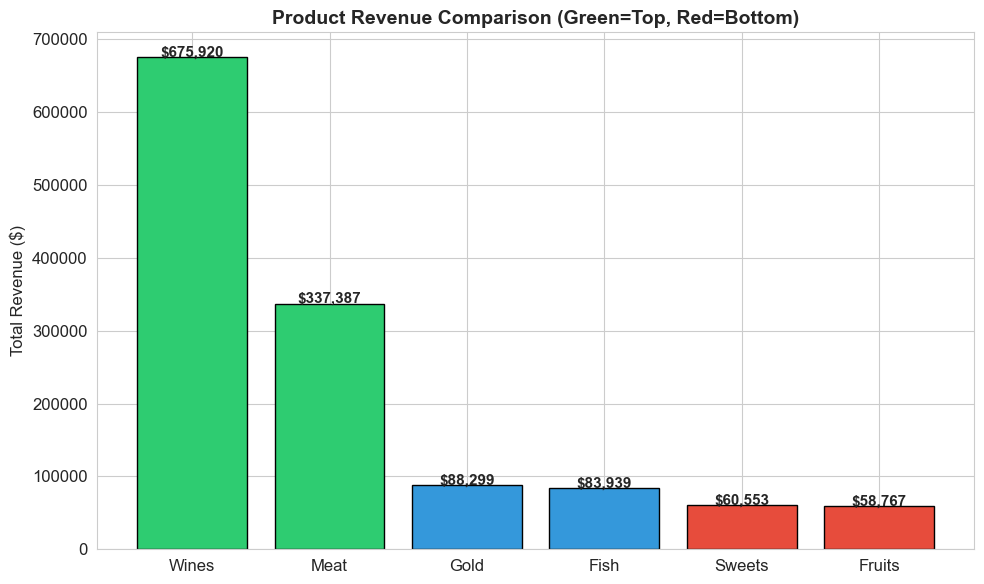

Top performer: Wines ($675,920)
Lowest performer: Fruits ($58,767)


In [22]:
product_spending = {
    'Wines': df['MntWines'].sum(),
    'Meat': df['MntMeatProducts'].sum(),
    'Gold': df['MntGoldProds'].sum(),
    'Fish': df['MntFishProducts'].sum(),
    'Sweets': df['MntSweetProducts'].sum(),
    'Fruits': df['MntFruits'].sum()
}

product_df = pd.DataFrame(list(product_spending.items()), columns=['Product', 'Total_Revenue'])
product_df = product_df.sort_values('Total_Revenue', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#2ecc71' if i < 2 else '#e74c3c' if i >= len(product_df)-2 else '#3498db'
          for i in range(len(product_df))]
bars = ax.bar(product_df['Product'], product_df['Total_Revenue'], color=colors, edgecolor='black')

for bar, val in zip(bars, product_df['Total_Revenue']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
            f'${val:,.0f}', ha='center', fontweight='bold', fontsize=11)

ax.set_ylabel('Total Revenue ($)')
ax.set_title('Product Revenue Comparison (Green=Top, Red=Bottom)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Top performer: {product_df.iloc[0]['Product']} (${product_df.iloc[0]['Total_Revenue']:,.0f})")
print(f"Lowest performer: {product_df.iloc[-1]['Product']} (${product_df.iloc[-1]['Total_Revenue']:,.0f})")

### 10.2 Correlation Between Age and Last Campaign Acceptance Rate

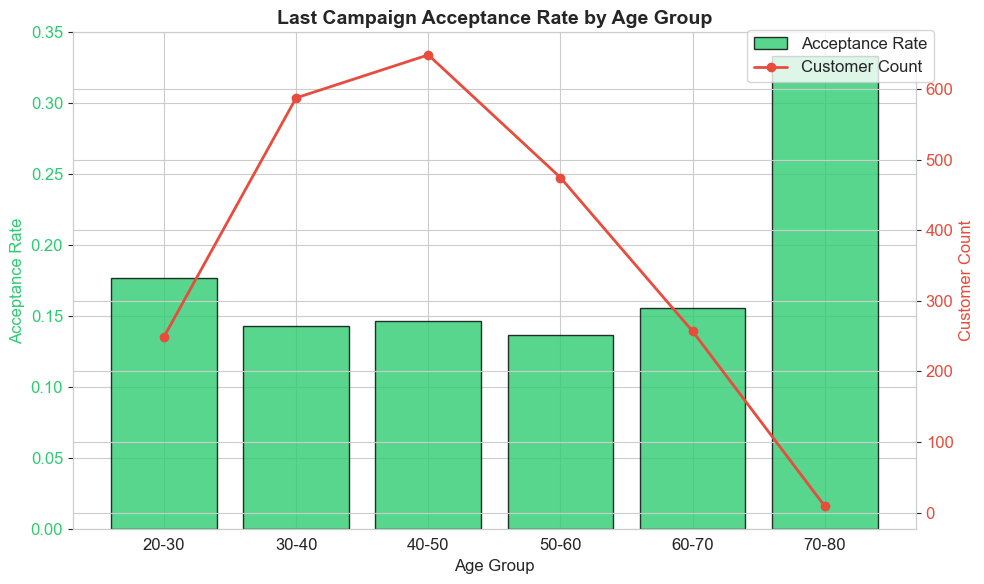

Point-biserial correlation (Age vs Response): r = -0.0184, p = 0.383754


In [23]:
# 'Response' column represents acceptance of the last campaign
# Create age bins for better visualization
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 100],
                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'])

acceptance_by_age = df.groupby('Age_Group', observed=True)['Response'].agg(['mean', 'count'])
acceptance_by_age.columns = ['Acceptance_Rate', 'Count']

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = '#2ecc71'
bars = ax1.bar(acceptance_by_age.index.astype(str), acceptance_by_age['Acceptance_Rate'],
               color=color1, edgecolor='black', alpha=0.8, label='Acceptance Rate')
ax1.set_ylabel('Acceptance Rate', color=color1, fontsize=12)
ax1.set_xlabel('Age Group', fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = '#e74c3c'
ax2.plot(acceptance_by_age.index.astype(str), acceptance_by_age['Count'],
         color=color2, marker='o', linewidth=2, label='Customer Count')
ax2.set_ylabel('Customer Count', color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Last Campaign Acceptance Rate by Age Group', fontsize=14, fontweight='bold')
fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95))
plt.tight_layout()
plt.show()

# Point-biserial correlation
corr, pval = stats.pointbiserialr(df['Response'], df['Age'])
print(f"Point-biserial correlation (Age vs Response): r = {corr:.4f}, p = {pval:.6f}")

### 10.3 Country with Highest Last Campaign Acceptance

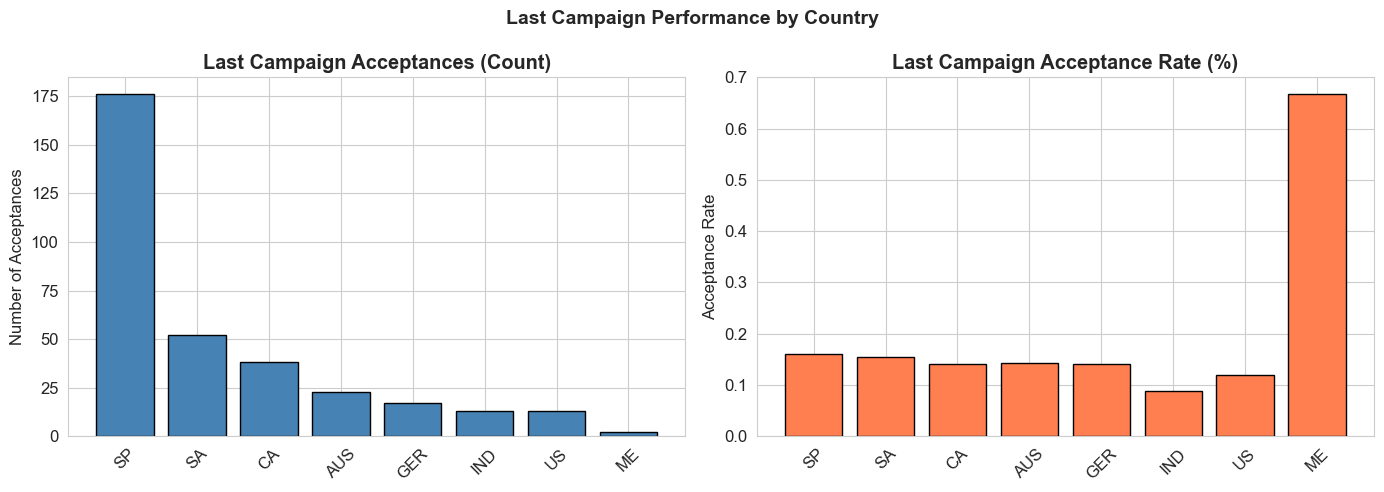

Campaign acceptance by country:
         Accepted  Total_Customers  Acceptance_Rate
Country                                            
SP            176             1094         0.160878
SA             52              336         0.154762
CA             38              268         0.141791
AUS            23              160         0.143750
GER            17              120         0.141667
IND            13              147         0.088435
US             13              109         0.119266
ME              2                3         0.666667


In [24]:
campaign_by_country = df.groupby('Country')['Response'].agg(['sum', 'count', 'mean'])
campaign_by_country.columns = ['Accepted', 'Total_Customers', 'Acceptance_Rate']
campaign_by_country = campaign_by_country.sort_values('Accepted', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Absolute count
axes[0].bar(campaign_by_country.index, campaign_by_country['Accepted'],
            color='steelblue', edgecolor='black')
axes[0].set_ylabel('Number of Acceptances')
axes[0].set_title('Last Campaign Acceptances (Count)', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Acceptance rate
axes[1].bar(campaign_by_country.index, campaign_by_country['Acceptance_Rate'],
            color='coral', edgecolor='black')
axes[1].set_ylabel('Acceptance Rate')
axes[1].set_title('Last Campaign Acceptance Rate (%)', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Last Campaign Performance by Country', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Campaign acceptance by country:")
print(campaign_by_country.to_string())

### 10.4 Pattern Between Number of Children at Home and Total Expenditure

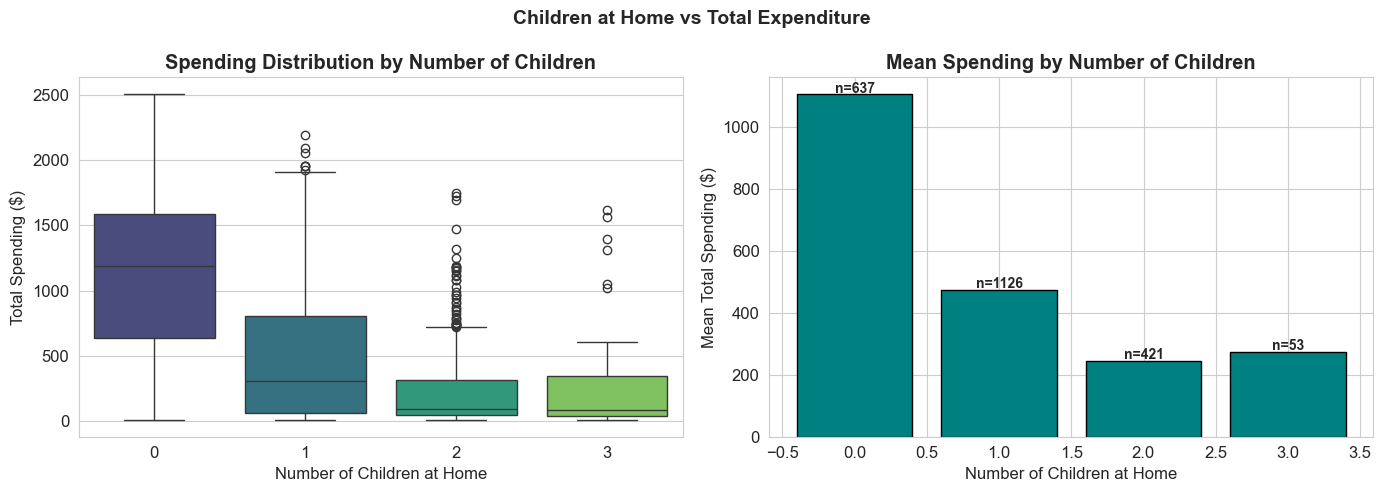

Spending by number of children:
                Mean_Spending  Median_Spending  Count
Total_Children                                       
0                 1104.783359           1189.0    637
1                  473.495560            306.0   1126
2                  245.947743             93.0    421
3                  274.603774             88.0     53


In [25]:
children_spending = df.groupby('Total_Children')['Total_Spending'].agg(['mean', 'median', 'count'])
children_spending.columns = ['Mean_Spending', 'Median_Spending', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(x='Total_Children', y='Total_Spending', data=df, ax=axes[0], palette='viridis')
axes[0].set_xlabel('Number of Children at Home')
axes[0].set_ylabel('Total Spending ($)')
axes[0].set_title('Spending Distribution by Number of Children', fontweight='bold')

# Bar plot of means
axes[1].bar(children_spending.index, children_spending['Mean_Spending'],
            color='teal', edgecolor='black')
for i, (idx, row) in enumerate(children_spending.iterrows()):
    axes[1].text(idx, row['Mean_Spending'] + 5, f'n={int(row["Count"])}',
                 ha='center', fontsize=10, fontweight='bold')
axes[1].set_xlabel('Number of Children at Home')
axes[1].set_ylabel('Mean Total Spending ($)')
axes[1].set_title('Mean Spending by Number of Children', fontweight='bold')

plt.suptitle('Children at Home vs Total Expenditure', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Spending by number of children:")
print(children_spending.to_string())

### 10.5 Educational Background of Customers Who Complained (Last 2 Years)

Total complainers: 20
Total non-complainers: 2217


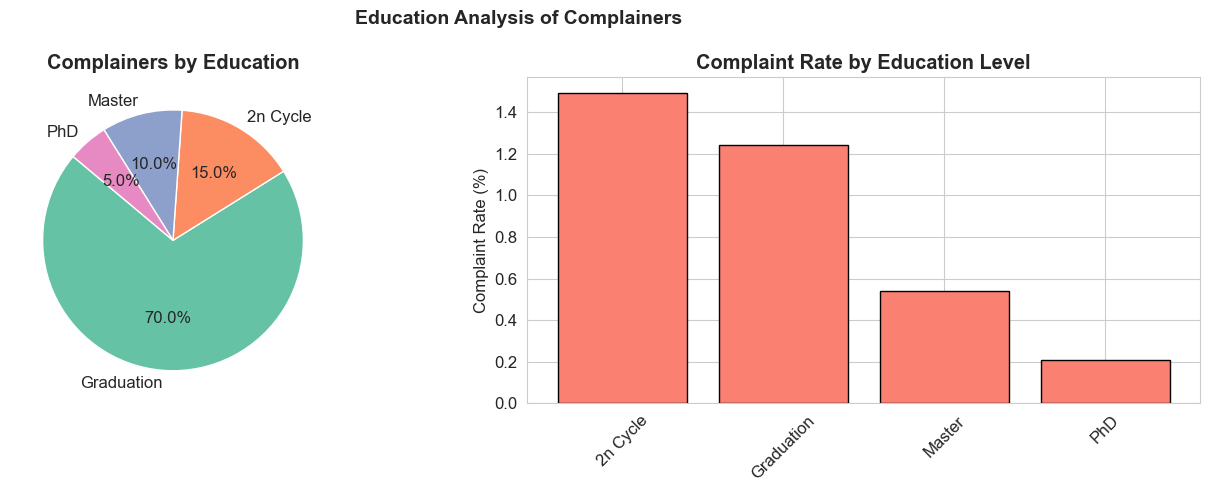


Complaint counts by education:
Education
Graduation    14
2n Cycle       3
Master         2
PhD            1


In [26]:
complainers = df[df['Complain'] == 1]
non_complainers = df[df['Complain'] == 0]

print(f"Total complainers: {len(complainers)}")
print(f"Total non-complainers: {len(non_complainers)}")

complaint_by_edu = complainers['Education'].value_counts()
overall_by_edu = df['Education'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart of complainers by education
axes[0].pie(complaint_by_edu, labels=complaint_by_edu.index, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette('Set2'))
axes[0].set_title('Complainers by Education', fontweight='bold')

# Complaint rate by education
complaint_rate = (complainers.groupby('Education').size() / df.groupby('Education').size() * 100)
complaint_rate = complaint_rate.sort_values(ascending=False)
axes[1].bar(complaint_rate.index, complaint_rate.values, color='salmon', edgecolor='black')
axes[1].set_ylabel('Complaint Rate (%)')
axes[1].set_title('Complaint Rate by Education Level', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Education Analysis of Complainers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nComplaint counts by education:")
print(complaint_by_edu.to_string())

## 11. Summary & Key Findings

### Data Cleaning & Preparation
- Parsed `Income` from string format (`$xx,xxx.00`) to numeric
- Converted `Dt_Customer` to datetime
- Cleaned `Marital_Status` by consolidating unusual categories (YOLO, Alone, Absurd) into meaningful groups
- Imputed 24 missing `Income` values using group medians (Education × Marital Status)
- Removed unrealistic age entries (Age > 100) and capped outliers using IQR method

### Feature Engineering
- **Total_Children** = Kidhome + Teenhome
- **Age** = Reference year - Year_Birth
- **Total_Spending** = Sum of all product expenditures
- **Total_Purchases** = Sum of purchases across Web, Catalog, and Store channels

### Hypothesis Testing Results
1. **Older customers & in-store shopping** — Tested whether older customers have a higher proportion of store purchases
2. **Children & online shopping** — Tested whether customers with children make more web purchases
3. **Store cannibalization** — Tested for negative correlation between store and other channel purchases
4. **US vs Rest of World** — Tested whether the US significantly outperforms in total purchases

### Key Visualizations
- Product revenue comparison identifying top and bottom performers
- Age group vs last campaign acceptance rate
- Country-wise campaign performance
- Children at home vs spending patterns
- Education breakdown of customer complaints